In [60]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [73]:
# === NOTEBOOK & IMPORT SETUP ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy

pd.set_option("display.max_columns", None)
%matplotlib inline

In [62]:
num_features = 28 * 28

X_train = X_train.reshape(-1, num_features)
X_test = X_test.reshape(-1, num_features) # -1 means unspecified

In [82]:
X_train = X_train / 255.0
X_test = X_test / 255.0
k=10

In [64]:
from sklearn.model_selection import train_test_split
XX_train,validation_train, yy_train,validation_test = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

In [65]:
# input data
train_dataset = XX_train.copy()
train_labels = yy_train.copy()
test_dataset = X_test.copy()
test_labels =  y_test.copy()
valid_dataset = validation_train.copy()
valid_labels = validation_train.copy()

In [108]:
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss =  (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [109]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

# def oneHotIt(y, k):
#     """ one hot encoding """
#     one_hot = np.zeros((len(y), k))
#     one_hot[np.arange(len(y)), y] = 1
#     return one_hot

In [110]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

# def softmax(z):
#     '''softmax function '''
#     z -= np.max(z)
#     return np.exp(z) / np.sum(np.exp(z))

In [111]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [120]:
w = np.zeros([train_dataset.shape[1],len(np.unique(train_labels))])
lam = 1
iterations = 500
learningRate = 0.10
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,train_dataset,train_labels,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print (loss)

1.7368649970278018


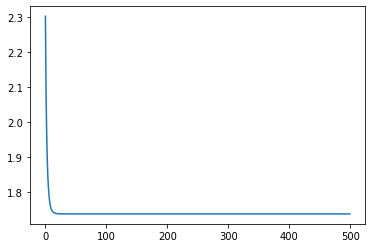

In [121]:
plt.plot(losses)

In [122]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [123]:
print ('Training Accuracy: ', getAccuracy(train_dataset,train_labels))
print ('Test Accuracy: ', getAccuracy(valid_dataset,valid_labels))

Training Accuracy:  0.6703888888888889
Test Accuracy:  0.0


/home/nnamdi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
